# Data Visualization Report

## Analysis of Traffic Congestion and Speed in Basel City

**Objective**: This document is a visualization of the analysis conducted to address the problem statement: "Does traffic congestion impact vehicular speed in Basel City?"

---

In [153]:
print("hello")

hello


In [154]:
# For creating connections and executing SQL commands
import sqlalchemy
from sqlalchemy import create_engine, text

# Pandas for data manipulation and analysis
import pandas as pd


import pymysql  # for MySQL


!pip install ipython-sql  
# %load_ext sql

# For visualizing data
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from db_config import db_config
from decimal import Decimal
from sklearn.preprocessing import MinMaxScaler

# Set up matplotlib to display inline in the notebook
%matplotlib inline

import folium


print("all packages imported")


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
all packages imported


After installing and importing all the packages, we now establish a connection to our database. Note that the file 'db_config.py' is a Python file with mappings to the credentials for our database.
Looking like this:
```python 
        db_config = {
            'user': 'your_username',
            'password': 'your_password',
            'host': 'your_host',
            'port': 'your_port',
            'database': 'your_database'
        }
```

In [155]:
 user = db_config['user']
password = db_config['password']
host = db_config['host']
port = db_config['port']
database = db_config['database']
connection_string = f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(connection_string)

try:
 # we try to connect
 with engine.connect() as connection:
  print("Connection established.")

  # We have a look if a query works, note that the query must be in the text method
  result = connection.execute(text("SELECT * FROM res_friday_vc_avg"))
  print("Connection test passed:", result.fetchall())

# exception in case something goes wrong
except Exception as e:
 print("An error occurred while connecting to the database:")
 print(e)

Connection established.
Connection test passed: [(16, Decimal('472.8375')), (14, Decimal('467.6324')), (15, Decimal('465.7060')), (17, Decimal('462.2029')), (13, Decimal('459.4648')), (18, Decimal('439.8874')), (11, Decimal('438.1766')), (7, Decimal('434.0410')), (12, Decimal('433.8468')), (10, Decimal('417.2770')), (8, Decimal('406.6863')), (9, Decimal('390.5011')), (19, Decimal('356.1158')), (6, Decimal('343.8336')), (20, Decimal('273.8638')), (21, Decimal('225.8351')), (22, Decimal('218.1442')), (23, Decimal('177.2946')), (5, Decimal('114.6582')), (0, Decimal('59.8050')), (4, Decimal('48.0554')), (1, Decimal('37.8179')), (3, Decimal('28.7010')), (2, Decimal('25.4756'))]


Since the connection was succesfully established, we now want to import our result tables.

In [156]:
table_names = [
 "res_monday_vc_avg", "res_monday_vc_spec", "res_monday_vel_avg", "res_monday_vel_spec",
 "res_wednesday_vc_avg", "res_wednesday_vc_spec", "res_wednesday_vel_avg", "res_wednesday_vel_spec",
 "res_friday_vc_avg", "res_friday_vc_spec", "res_friday_vel_avg", "res_friday_vel_spec",
 "res_saturday_vc_avg", "res_saturday_vc_spec", "res_saturday_vel_avg", "res_saturday_vel_spec",
 "res_sunday_vc_avg", "res_sunday_vc_spec", "res_sunday_vel_avg", "res_sunday_vel_spec"
]

try:
 for table_name in table_names:
  # Read the table 
  dataframe = pd.read_sql_table(table_name, engine)

  # Save to a CSV file
  dataframe.to_csv(f"{table_name}.csv", index=False)

  print(f"Table {table_name} saved to {table_name}.csv")

except Exception as e:
 print("An error occurred while reading and saving SQL Analysis Result table:", e)

Table res_monday_vc_avg saved to res_monday_vc_avg.csv
Table res_monday_vc_spec saved to res_monday_vc_spec.csv
Table res_monday_vel_avg saved to res_monday_vel_avg.csv
Table res_monday_vel_spec saved to res_monday_vel_spec.csv
Table res_wednesday_vc_avg saved to res_wednesday_vc_avg.csv
Table res_wednesday_vc_spec saved to res_wednesday_vc_spec.csv
Table res_wednesday_vel_avg saved to res_wednesday_vel_avg.csv
Table res_wednesday_vel_spec saved to res_wednesday_vel_spec.csv
Table res_friday_vc_avg saved to res_friday_vc_avg.csv
Table res_friday_vc_spec saved to res_friday_vc_spec.csv
Table res_friday_vel_avg saved to res_friday_vel_avg.csv
Table res_friday_vel_spec saved to res_friday_vel_spec.csv
Table res_saturday_vc_avg saved to res_saturday_vc_avg.csv
Table res_saturday_vc_spec saved to res_saturday_vc_spec.csv
Table res_saturday_vel_avg saved to res_saturday_vel_avg.csv
Table res_saturday_vel_spec saved to res_saturday_vel_spec.csv
Table res_sunday_vc_avg saved to res_sunday_vc_a

We take now for example friday average result over the 12 measurement points and try to see if traffic congestion has some impact on the speed.

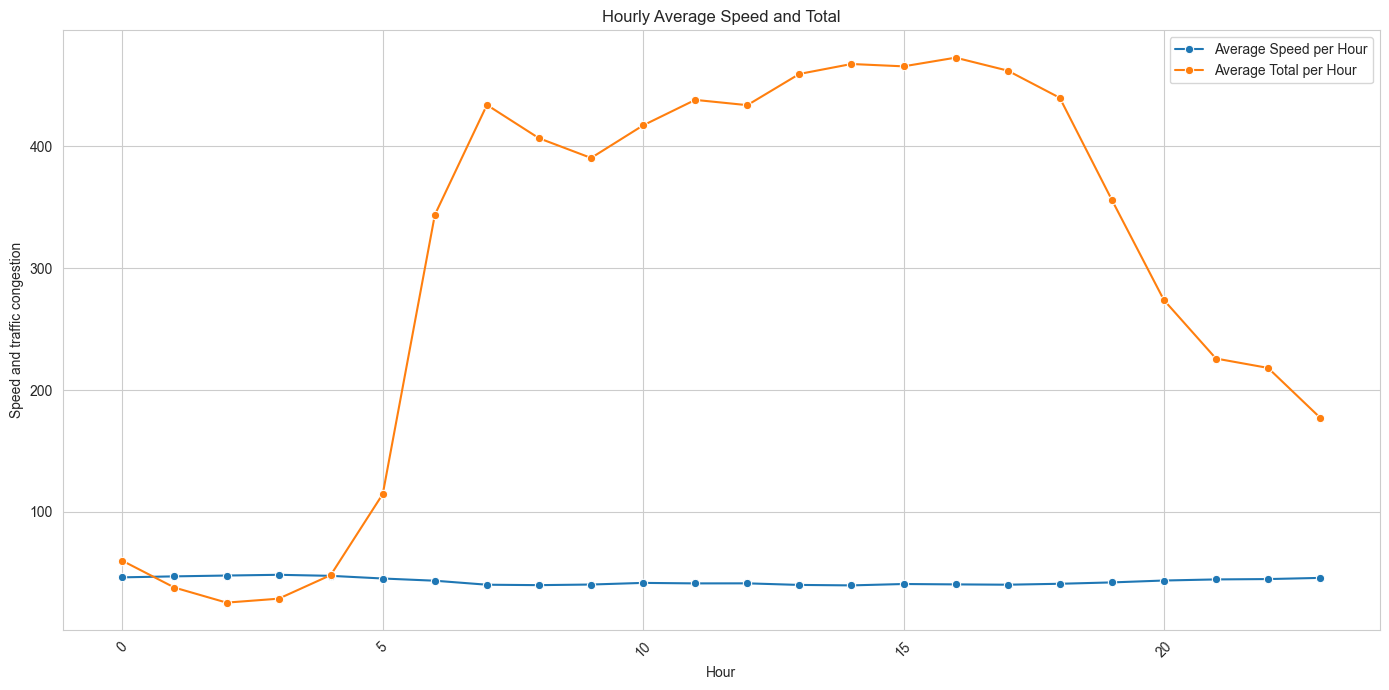

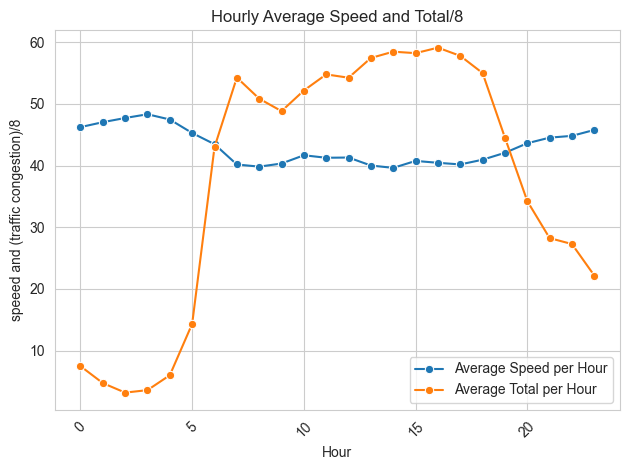

In [157]:
# the plot can be made a bit better maybe, as we cannot clearly se when the traffic congestion is low the speed increases.
# Load the datasets
vc_avg_df = pd.read_csv('res_friday_vc_avg.csv')
vel_avg_df = pd.read_csv('res_friday_vel_avg.csv')

# We kind of do a join, that we did in sql 
merged_df = pd.merge(vc_avg_df, vel_avg_df, on='Hour')

# Plotting
plt.figure(figsize=(14, 7))

# Speed plot
sns.lineplot(data=merged_df, x='Hour', y='AverageSpeedPerHour', label='Average Speed per Hour', marker='o')

# Total plot
sns.lineplot(data=merged_df, x='Hour', y='AverageTotalPerHour', label='Average Total per Hour', marker='o')

plt.title('Hourly Average Speed and Total')
plt.xlabel('Hour')
plt.ylabel('Speed and traffic congestion')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

# Since we are mostly just interested in the ratio, we divide the congestion by 6 to see the result
merged_df['AverageTotalPerHour'] = merged_df['AverageTotalPerHour'] / 8
# Speed plot
sns.lineplot(data=merged_df, x='Hour', y='AverageSpeedPerHour', label='Average Speed per Hour', marker='o')

# Total plot
sns.lineplot(data=merged_df, x='Hour', y='AverageTotalPerHour', label='Average Total per Hour', marker='o')
plt.title('Hourly Average Speed and Total/8')
plt.xlabel('Hour')
plt.ylabel('speeed and (traffic congestion)/8')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

From especially the second plot we can see that whenever the traffic congestion increases we have a drop is speed. Note that since we have taken the average over the whole hour, the drop must be more significant that the results suggests, but still on the average speed we can see that the average speed decreases whenever the congestion increases.

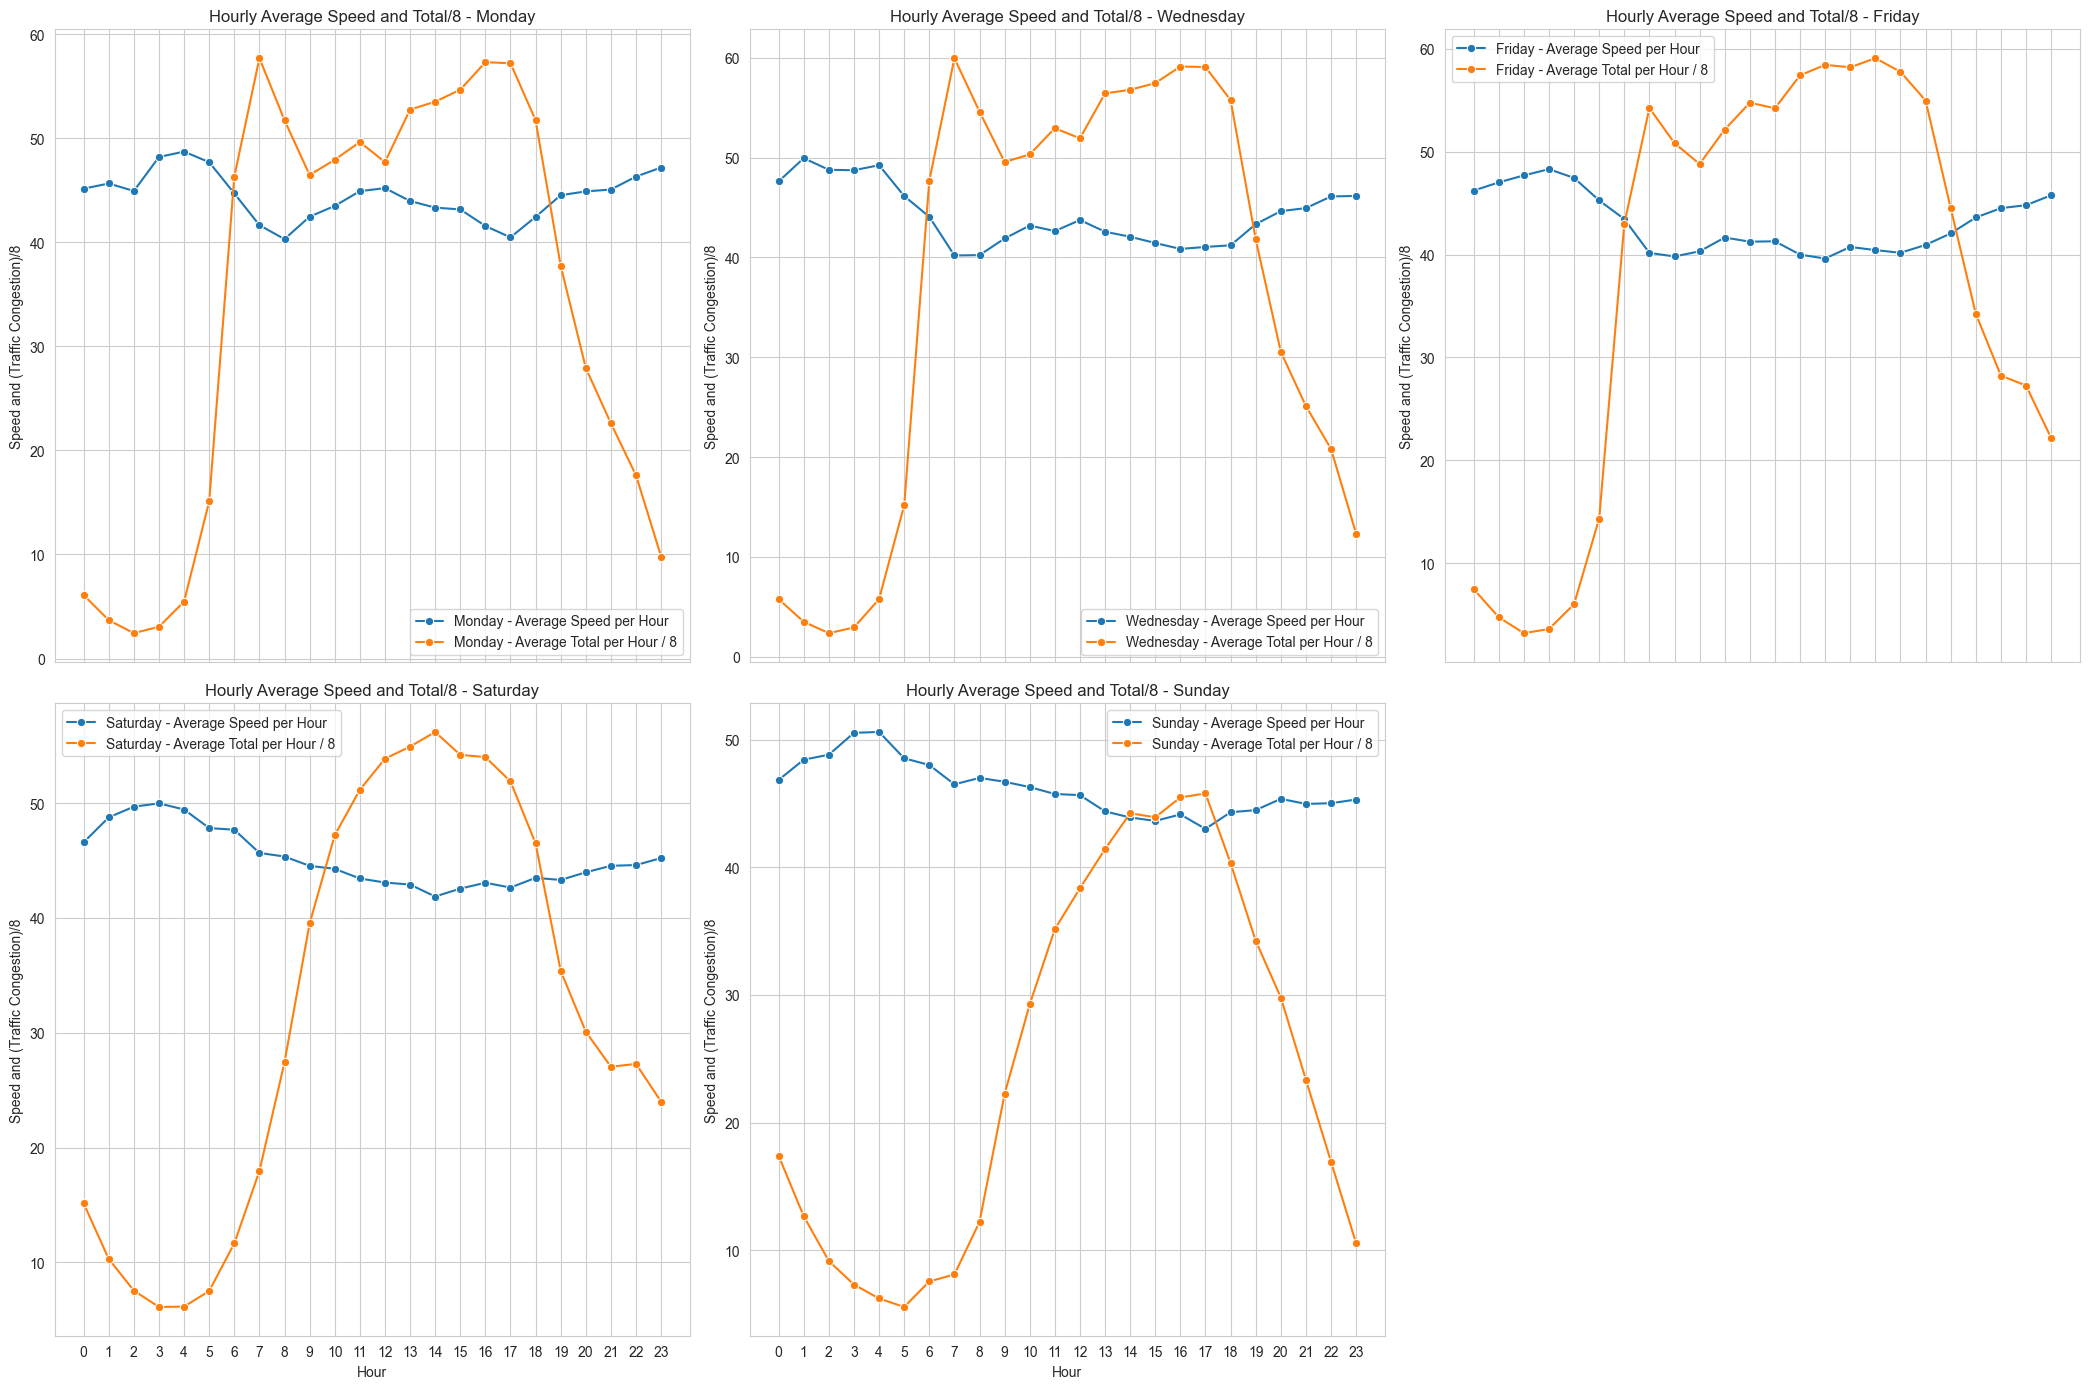

In [158]:
days = ['monday', 'wednesday', 'friday', 'saturday', 'sunday']

# Set up the matplotlib figure with subplots in a 2x3 grid
# Adjust figsize as needed
fig, axes = plt.subplots(2, 3, figsize=(21, 14), sharex=True)

# Flatten the axes array for easy indexing
axes = axes.flatten()

for i, day in enumerate(days):
 # Load the datasets
 vc_avg_df = pd.read_csv(f'res_{day}_vc_avg.csv')
 vel_avg_df = pd.read_csv(f'res_{day}_vel_avg.csv')

 # Merge the datasets on the 'Hour' column
 merged_df = pd.merge(vc_avg_df, vel_avg_df, on='Hour')

 # Since we are mostly interested in the ratio, we divide the congestion by 8
 merged_df['AverageTotalPerHour'] = merged_df['AverageTotalPerHour'] / 8

 # Define the subplot to use
 ax = axes[i]

 # Speed plot for the day
 sns.lineplot(ax=ax, data=merged_df, x='Hour', y='AverageSpeedPerHour', label=f'{day.capitalize()} - Average Speed per Hour', marker='o')

 # Total plot for the day (after division)
 sns.lineplot(ax=ax, data=merged_df, x='Hour', y='AverageTotalPerHour', label=f'{day.capitalize()} - Average Total per Hour / 8', marker='o')

 # Set the title and labels for the subplot
 ax.set_title(f'Hourly Average Speed and Total/8 - {day.capitalize()}')
 ax.set_xlabel('Hour')
 ax.set_ylabel('Speed and (Traffic Congestion)/8')
 ax.legend()
 ax.grid(True)

# If you have an empty subplot, you can turn it off
if len(days) < len(axes):
 for j in range(len(days), len(axes)):
  axes[j].axis('off')

# Rotate x-axis labels and adjust layout
plt.setp(axes, xticks=merged_df['Hour'].unique())
plt.tight_layout()

# Show the final combined plot
plt.show()

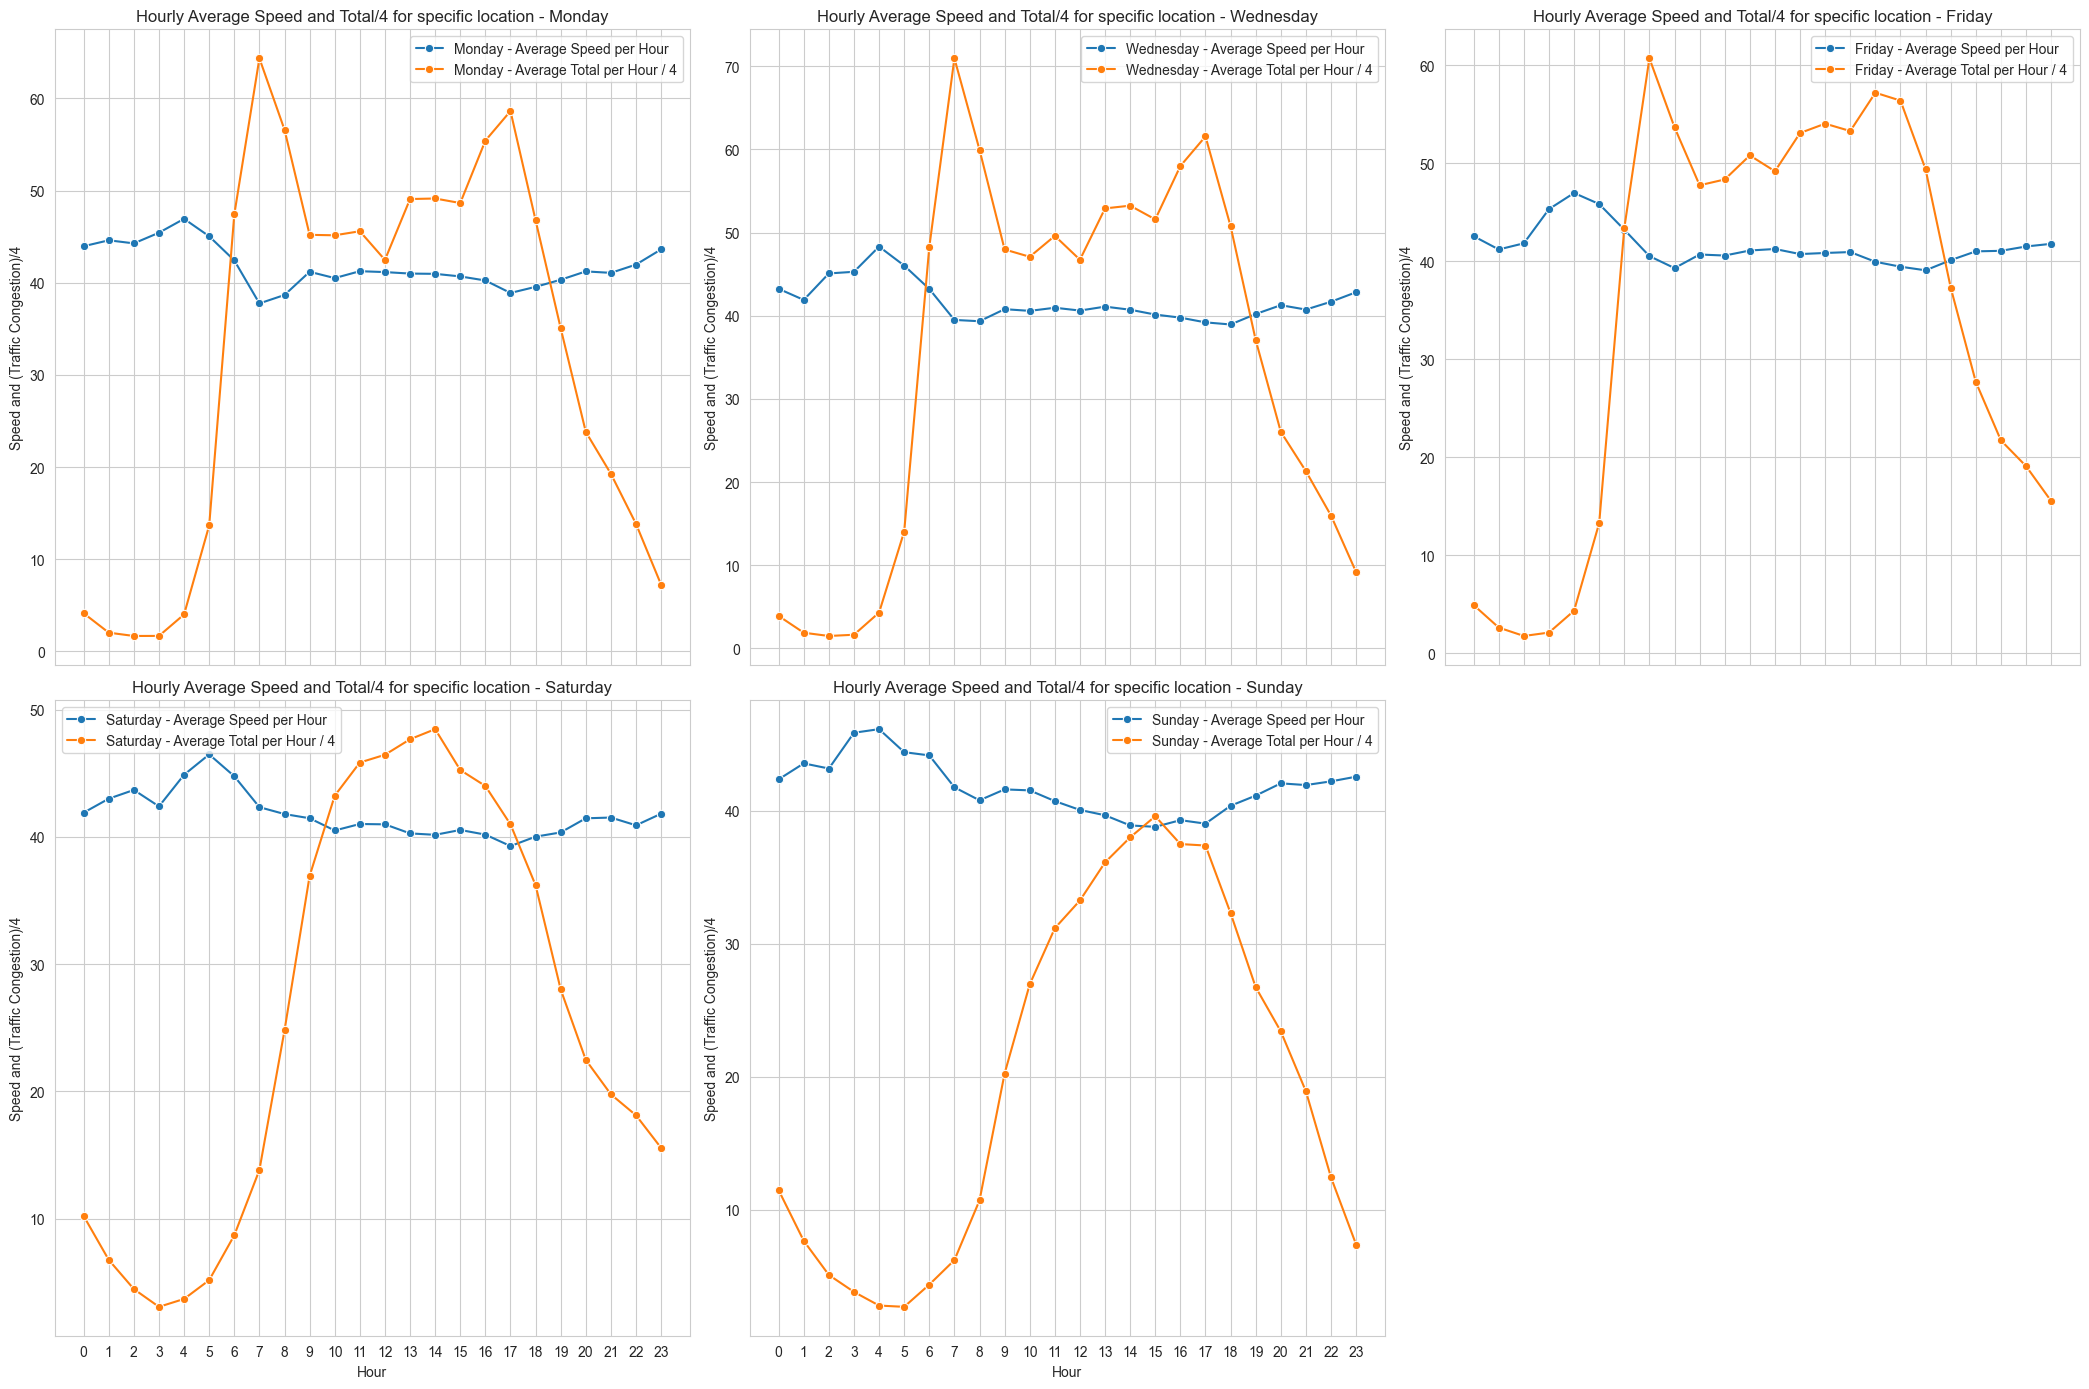

In [159]:
days = ['monday', 'wednesday', 'friday', 'saturday', 'sunday']

# Set up the matplotlib figure with subplots in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(21, 14), sharex=True)

# easy indexing
axes = axes.flatten()

for i, day in enumerate(days):
 # Load the datasets
 vc_avg_df = pd.read_csv(f'res_{day}_vc_spec.csv')
 vel_avg_df = pd.read_csv(f'res_{day}_vel_spec.csv')

 
 merged_df = pd.merge(vc_avg_df, vel_avg_df, on='Hour')

 # Since we are mostly interested in the ratio, we divide the congestion by 8
 merged_df['AverageTotalPerHour'] = merged_df['AverageTotalPerHour']  / 4

 ax = axes[i]

 sns.lineplot(ax=ax, data=merged_df, x='Hour', y='AverageSpeedPerHour', label=f'{day.capitalize()} - Average Speed per Hour', marker='o')

 sns.lineplot(ax=ax, data=merged_df, x='Hour', y='AverageTotalPerHour', label=f'{day.capitalize()} - Average Total per Hour / 4', marker='o')

 ax.set_title(f'Hourly Average Speed and Total/4 for specific location - {day.capitalize()}')
 ax.set_xlabel('Hour')
 ax.set_ylabel('Speed and (Traffic Congestion)/4')
 ax.legend()
 ax.grid(True)

# If you have an empty subplot, you can turn it off
if len(days) < len(axes):
 for j in range(len(days), len(axes)):
  axes[j].axis('off')

# Rotate x-axis labels and adjust layout
plt.setp(axes, xticks=merged_df['Hour'].unique())
plt.tight_layout()

# Show the final combined plot
plt.show()

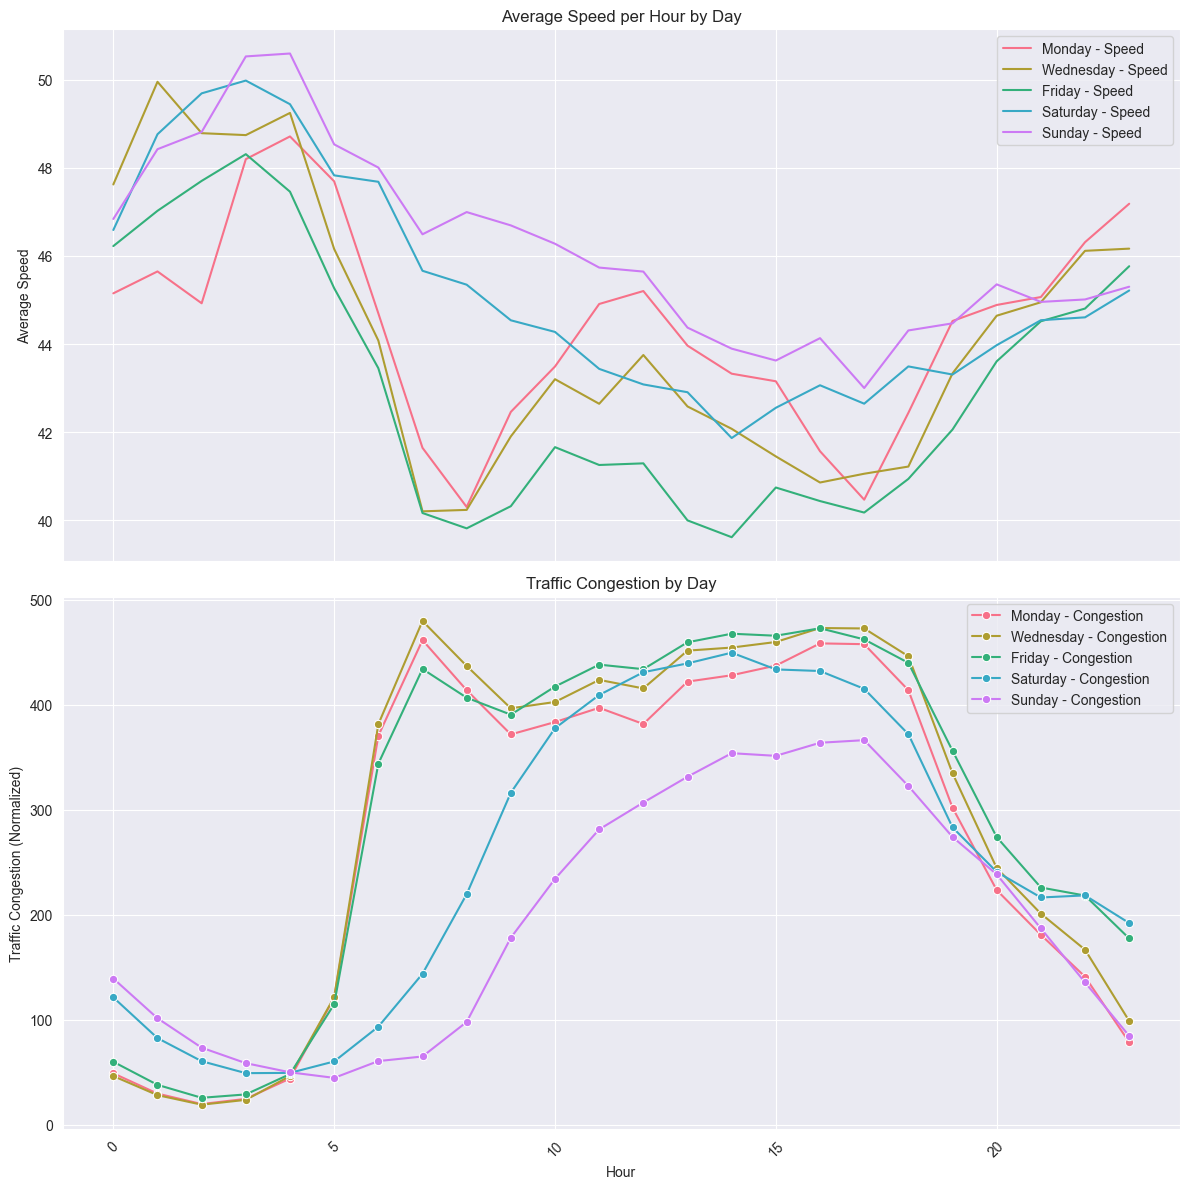

In [172]:
days = ['monday', 'wednesday', 'friday', 'saturday', 'sunday']
colors = sns.color_palette("husl", len(days))

fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

all_data = pd.DataFrame()

for i, day in enumerate(days):
 vc_avg_df = pd.read_csv(f'res_{day}_vc_avg.csv')
 vel_avg_df = pd.read_csv(f'res_{day}_vel_avg.csv')
 merged_df = pd.merge(vc_avg_df, vel_avg_df, on='Hour')
 merged_df['Day'] = day.capitalize()  # Add a column for the day of the week
 all_data = pd.concat([all_data, merged_df], ignore_index=True)

all_data['NormalizedCongestion'] = all_data['AverageTotalPerHour'] / 8

for i, day in enumerate(days):
 day_data = all_data[all_data['Day'] == day.capitalize()]
 sns.lineplot(ax=axes[0], data=day_data, x='Hour', y='AverageSpeedPerHour', label=f'{day.capitalize()} - Speed', color=colors[i])

for i, day in enumerate(days):
 day_data = all_data[all_data['Day'] == day.capitalize()]
 sns.lineplot(ax=axes[1], data=day_data, x='Hour', y='AverageTotalPerHour', label=f'{day.capitalize()} - Congestion', color=colors[i], marker='o')

axes[0].set_title('Average Speed per Hour by Day')
axes[0].set_ylabel('Average Speed')
axes[0].legend()

axes[1].set_title('Traffic Congestion by Day')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Traffic Congestion (Normalized)')
axes[1].legend()

plt.xticks(rotation=45) 
plt.tight_layout()  

plt.show()

In [160]:
query = "SELECT * FROM close_points_50;"
close_points_50_df = pd.read_sql_query(query, engine)

close_points_50_df.to_csv('close_points_50.csv', index=False)

In [171]:
close_points_50_df = pd.read_csv('close_points_50.csv')

geopoints = close_points_50_df['VC_GeoPoint_var'].str.extract(r'(?P<lat>[\d.-]+),\s*(?P<lon>[\d.-]+)').astype(float)

print(geopoints)

map = folium.Map(location=[geopoints['lat'].mean(), geopoints['lon'].mean()], zoom_start=12)

for idx, row in geopoints.iterrows():
 folium.Marker(location=[row['lat'], row['lon']]).add_to(map)

map

         lat       lon
0  47.552083  7.586770
1  47.546300  7.595611
2  47.577126  7.596559
3  47.572289  7.623986
4  47.570735  7.582267
5  47.570403  7.628571
6  47.542736  7.584996
7  47.548772  7.600746


In [162]:
# Query the table (select all columns and rows)
query = "SELECT * FROM res_top5_speeding_geo;"
res_top5_speeding_geo = pd.read_sql_query(query, engine)

# Save the DataFrame to a CSV file
res_top5_speeding_geo.to_csv('res_top5_speeding_geo.csv', index=False)

In [163]:
# Query the table (select all columns and rows)
query = "SELECT * FROM res_single_recordings_top5;"
res_single_recordings_top5_df = pd.read_sql_query(query, engine)

# Save the DataFrame to a CSV file
res_single_recordings_top5_df.to_csv('res_single_recordings_top5.csv', index=False)

In [164]:
# Load the data from the CSV file
res_top5_speeding_geo_df = pd.read_csv('res_top5_speeding_geo.csv')


geopoints_str = res_top5_speeding_geo_df['Geopoint'].str.extract(r'(?P<lat>[\d.-]+),\s*(?P<lon>[\d.-]+)')

# Convert the extracted strings to Decimal using apply with a lambda function
geopoints = geopoints_str.apply(lambda x: x.map(Decimal))

print(geopoints)
# Initialize a map centered around the average location
map = folium.Map(location=[geopoints['lat'].mean(), geopoints['lon'].mean()], zoom_start=12)

# Add points to the map
for idx, row in geopoints.iterrows():
 folium.Marker(location=[row['lat'], row['lon']]).add_to(map)

# Display the map
map


                 lat                lon
0  47.54407746292579   7.60745076006348
1  47.54311543220996  7.620347005420095
2  47.56571351254245  7.636077359526878
3  47.56571356266707  7.636077449750412
4  47.56478111540047  7.613695373536265


In [168]:

file_path = 'res_single_recordings_top5.csv'
data = pd.read_csv(file_path)
geopoints_str = data['Geopoint'].str.extract(r'(?P<lat>[\d.-]+),\s*(?P<lon>[\d.-]+)')
geopoints = geopoints_str.apply(lambda x: x.map(Decimal))

scaler = MinMaxScaler()
data['NormalizedSpeedingDiff'] = scaler.fit_transform(data[['SpeedingDifference']])

map = folium.Map(location=[geopoints['lat'].mean(), geopoints['lon'].mean()], zoom_start=12)

def color_from_value(value):
 return f'#{int(255 * value):02x}0000'

for idx, row in geopoints.iterrows():
 color = color_from_value(data.at[idx, 'NormalizedSpeedingDiff'])

 tooltip = f"Speeding Difference: {data.at[idx, 'SpeedingDifference']}"

 folium.CircleMarker(
  location=[row['lat'], row['lon']],
  radius=5,
  color=color,
  fill=True,
  fill_color=color,
  tooltip=tooltip
 ).add_to(map)

map

               Street   Type  Value
0    Tüllingerstrasse   Zone     20
1    Tüllingerstrasse   Zone     20
2        Voltastrasse   Zone     50
3  Davidsbodenstrasse   Zone     20
4  St. Jakobs-Strasse   Zone     30
5    Tüllingerstrasse  Speed    188
6    Tüllingerstrasse  Speed    177
7        Voltastrasse  Speed    187
8  Davidsbodenstrasse  Speed    148
9  St. Jakobs-Strasse  Speed    137


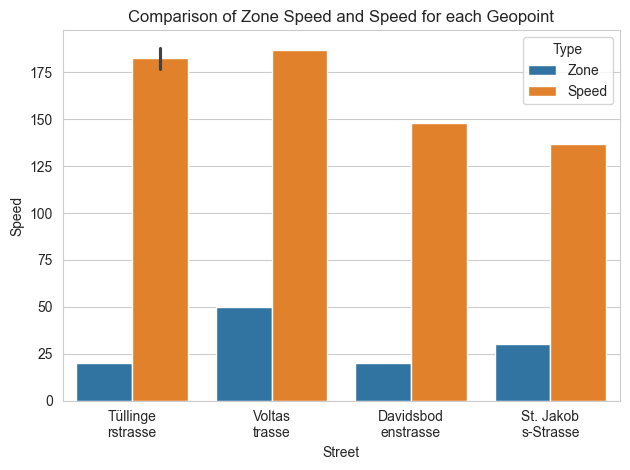

In [170]:
data_long = data.melt(id_vars='Street', value_vars=['Zone', 'Speed'], var_name='Type', value_name='Value')
print(data_long)

sns.barplot(x='Street', y='Value', hue='Type', data=data_long)

plt.title('Comparison of Zone Speed and Speed for each Geopoint')
plt.xlabel('Street')
plt.ylabel('Speed')

labels = [label.get_text() for label in plt.gca().get_xticklabels()]

new_labels = [label[:len(label)//2] + '\n' + label[len(label)//2:] for label in labels]

plt.xticks(range(len(labels)), new_labels, rotation=0)  # Set rotation to 0 for horizontal labels

plt.tight_layout()  
plt.show()